Author: Amparo Godoy Pastore <br>
Date: June 2nd, 2024 <br>
Course: CAP 6619 - Deep Learning - Florida Atlantic University <br>

# Dense Layer Classification

In [45]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


# loading data
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

2.16.1


In [46]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

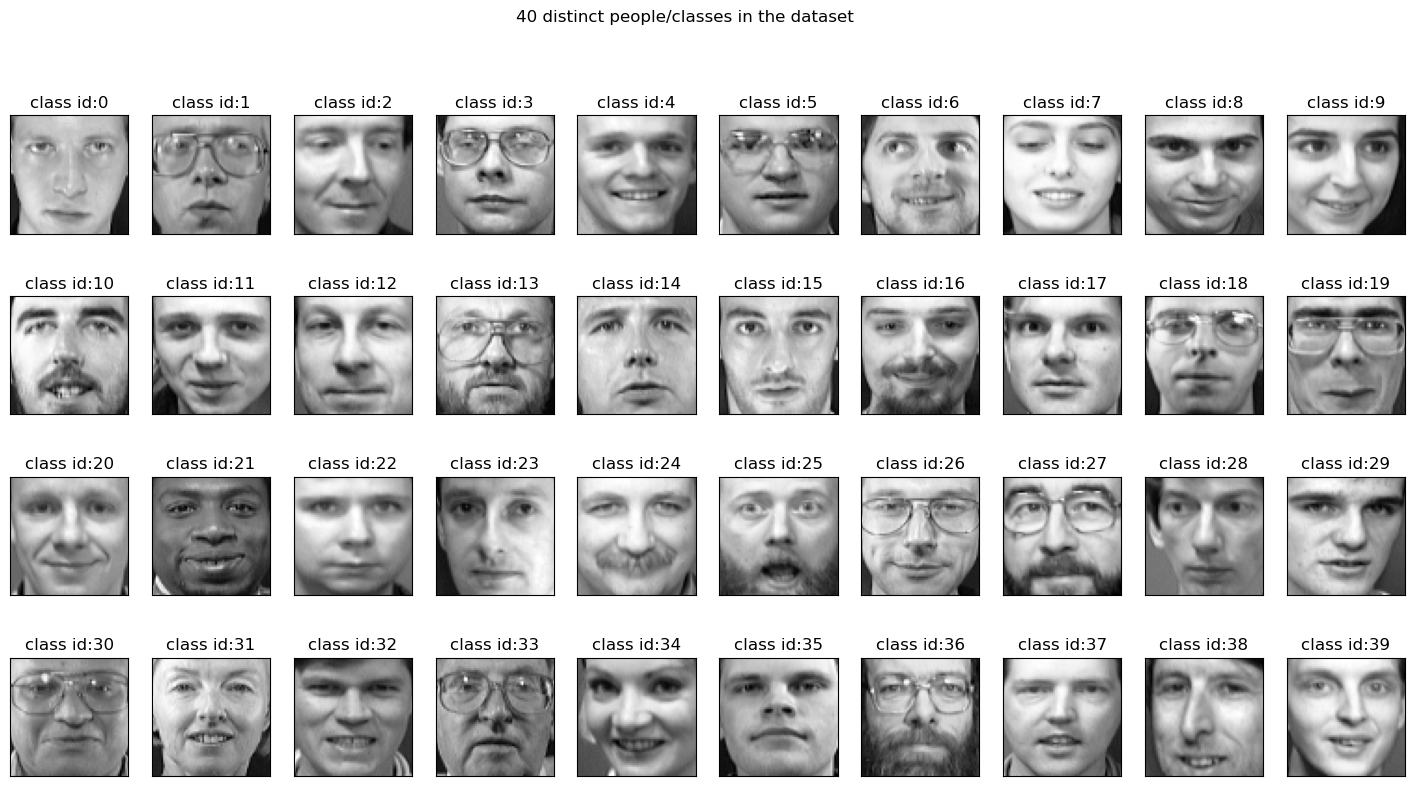

In [47]:
# Please show at least one face images for each class in the Oivetti face dataset100.
show_a_random_face_per_class(data, np.unique(target))

In [48]:
# Randomly split the dataset into 60% training and 40% test samples.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.4, random_state=42)

In [53]:
# Train a one-hidden layer neural network with 10 hidden nodes.

# defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 1),name="Input"),
    keras.layers.Dense(10, activation='sigmoid',name="Hidden"), # one hidden layer with 10 neurons
    keras.layers.Dense(40, name="Output"),
])
model.summary()

# compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training model on train set
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=0)

C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (Flatten)                      │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 10)                  │          40,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 40)                  │             440 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,410 (161.76 KB)

 Trainable params: 41,410 (161.76 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Report the classification accuracy of the classifier on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

5/5 - 0s - 6ms/step - accuracy: 0.3063 - loss: 2.7401
Test Accuracy: 30.63%


In [51]:
def create_model(layers):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(64, 64, 1)))
    model.add(keras.layers.Flatten())
    for units in layers:
        model.add(keras.layers.Dense(units, activation='sigmoid'))
    model.add(keras.layers.Dense(40))
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

def evaluate_model(layers, data, target, kf):
    accuracies = []
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        model = create_model(layers)
        model.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=0)
        
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return np.mean(accuracies), np.std(accuracies)

# Generate k-fold splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(data)

# Model configurations
model_configs = {
    "model_1": [10],
    "model_2": [50],
    "model_3": [500],
    "model_4": [50, 10]
}

# Evaluate each model using the same k-fold splits
results = {}
for name, layers in model_configs.items():
    mean_acc, std_acc = evaluate_model(layers, data, target, kf)
    results[name] = {'mean_accuracy': mean_acc, 'std_accuracy': std_acc}

C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model_1 - Mean Accuracy: 0.0150, Std Dev: 0.0122
model_2 - Mean Accuracy: 0.0450, Std Dev: 0.0150
model_3 - Mean Accuracy: 0.2725, Std Dev: 0.0647
model_4 - Mean Accuracy: 0.0225, Std Dev: 0.0208


In [52]:
# Please report and compare the cross-validation accuracy of the four neural networks, and conclude which classifier has the best performance
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Accuracy: {metrics['mean_accuracy']:.4f}, Std Dev: {metrics['std_accuracy']:.4f}")

model_1 - Mean Accuracy: 0.0150, Std Dev: 0.0122
model_2 - Mean Accuracy: 0.0450, Std Dev: 0.0150
model_3 - Mean Accuracy: 0.2725, Std Dev: 0.0647
model_4 - Mean Accuracy: 0.0225, Std Dev: 0.0208


- Model 1 with one hidden layer and 10 hidden nodes has the lowest mean accuracy of 0.0150 with a standard deviation of 0.0122.
- Model 2 with one hidden layer and 50 hidden nodes has a slightly higher mean accuracy of 0.0450 with a standard deviation of 0.0150.
- Model 3 with one hidden layer and 500 hidden nodes shows significant improvement, achieving a mean accuracy of 0.2725 with a standard deviation of 0.0647.
- Model 4 with two hidden layers (50 nodes in the first layer and 10 nodes in the second layer) performs slightly better than Model 1 and Model 2, with a mean accuracy of 0.0225 and a standard deviation of 0.0208.

Based on these results, Model 3, with one hidden layer and 500 hidden nodes, exhibits the best performance in terms of mean accuracy. Therefore, Model 3 would be the preferred choice among these neural network architectures for the given task.